In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.lines import Line2D
import json
from pathlib import Path
import os

In [2]:
###############################################################################
### Matplotlib Settings
###############################################################################

settings = {
    'font.weight' : 'normal',
    'font.size'   : 14
}
plt.rcParams.update(**settings)

# resolution for plots
dpi = 300

current_path = Path.cwd()

# path to csv files
results_path = os.path.join(current_path.parent, '3_results')

# saving path
saving_path = os.path.join(current_path.parent, '4_plots')

In [3]:
sample_sizes = [100, 1000, 10000]

computation_times = {'task_'+str(i): [] for i in range(1,4)}
techs = ['av_sampling','lhc_sampling' ]

In [4]:
### without cf ###

In [33]:
sample_size = 100
tech = 'av_sampling'
task = 4

df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,str(sample_size),'computation_times.csv'))

In [36]:
D = {}
H = []
for t in techs:
    for s in sample_sizes:
        sample_size = s
        tech = t
        task = 4
        df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,str(sample_size),'computation_times.csv'))
        H.append(df.iloc[0,1])
        D[t,s] = df.iloc[0,1]

D

{('av_sampling', 100): 116.90831851959229,
 ('av_sampling', 1000): 1291.9807102680204,
 ('av_sampling', 10000): 11580.125929832458,
 ('lhc_sampling', 100): 45.716262102127075,
 ('lhc_sampling', 1000): 441.54500222206116,
 ('lhc_sampling', 10000): 4646.068951129912}

In [32]:
H

[116.92625784873962,
 1291.9997355937958,
 11580.147427558899,
 46.298091173172,
 447.40523886680603,
 4703.760336160661]

In [41]:
### with cf ###

AV = []
LHC = []
task = 1
for s in sample_sizes:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),str(s),'computation_times.csv'))
    AV.append(df.iloc[0,1])

task = 2
for s in sample_sizes:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),str(s),'computation_times.csv'))
    LHC.append(df.iloc[0,1])

AV

[11.833707094192505, 114.52080011367798, 1157.315949201584]

Text(0.5, 1.0, 'with multiprocessing')

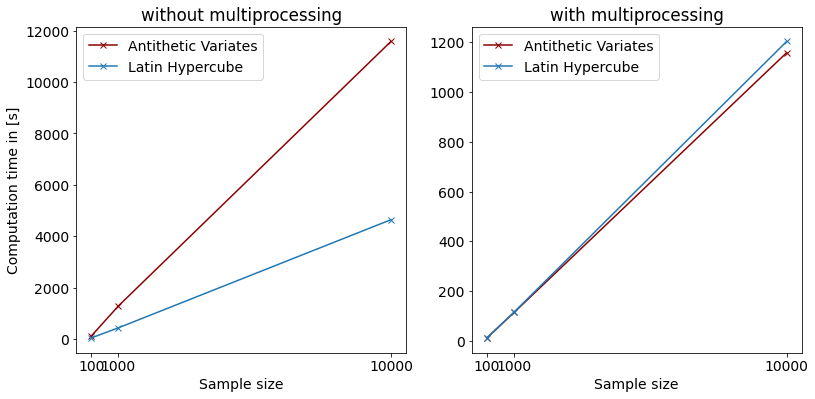

In [39]:
#fig1 = plt.figure(2,figsize=(12,9))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,6))
#ax1 = fig1.gca()
#ax2 = fig1.gca()

ax1.plot(
    sample_sizes,
    H[0:3],
    label='Antithetic Variates',
    marker='x',
    color='darkred')
ax1.plot(
    sample_sizes,
    H[3:6],
    label='Latin Hypercube',
    marker='x')

ax2.plot(
    sample_sizes,
    AV,
    label='Antithetic Variates',
    marker='x',
    color='darkred')
ax2.plot(
    sample_sizes,
    LHC,
    label='Latin Hypercube',
    marker='x')


ax1.legend()
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Computation time in [s]')
ax1.set_xticks(sample_sizes)
ax1.set_title('without multiprocessing')

ax2.legend()
ax2.set_xlabel('Sample size')
ax2.set_xticks(sample_sizes)
ax2.set_title('with multiprocessing')

In [50]:
### Task 5 ###
### Sensitivity ###
charges = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
task = 5
tech = 'av_sampling'
s = 'sensitivity_analysis'
sample_size = 10000
means = []
varss = []
for c in charges:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,s,str(sample_size),'testing','mean_var_'          +str(c)+'_1000.csv'))
    means.append(df.iloc[0,0])
    varss.append(df.iloc[0,1])


In [57]:
means
varss

[13.80480848680843,
 12.13651227411342,
 12.448344263936507,
 11.983151727393258,
 13.230908433450168,
 13.03337259746728,
 12.247564081063045,
 11.022552268446264,
 11.045803749436452]

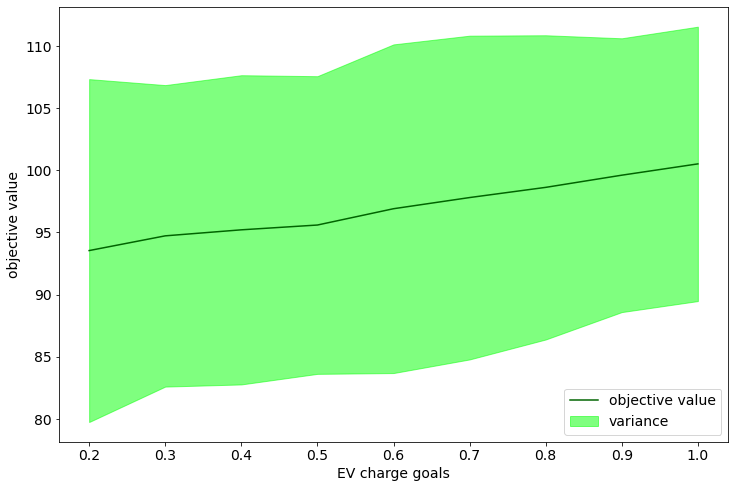

In [89]:
m = np.array(means)
v = np.array(varss)

fig = plt.figure(figsize=(12,8))

plt.plot(charges,means,label='objective value',color='darkgreen')
plt.fill_between(charges,m+v,m-v,label='variance',color= 'lime',alpha = 0.5)
plt.xlabel('EV charge goals')
plt.ylabel('objective value')
plt.legend(loc = 4);

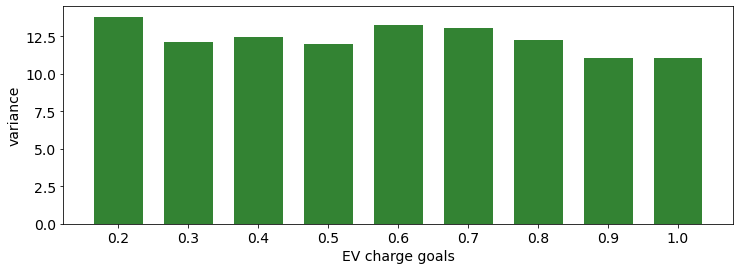

In [88]:
fig = plt.figure(figsize=(12,4))

plt.bar(charges,varss,width = 0.07,color='darkgreen',alpha=0.8)
plt.xlabel('EV charge goals')
plt.ylabel('variance')
plt.xticks(charges);